In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings

warnings.filterwarnings('ignore')

In [26]:
tickers = ['TSLA' , 'MSFT' , 'NVDA' , 'GOOG' , 'AAPL' , 'AMZN' , 'META' , 'NFLX' , 'TSM' , 'BABA']


today = dt.date.today()

df = yf.download(tickers, start='2020-01-01', end=today)['Close']

df.head()

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,BABA,GOOG,META,MSFT,NFLX,NVDA,TSLA,TSM
Date,,,,,,,,,,
2020-01-02,72.716072,94.900497,212.242126,68.046204,208.795929,153.323257,329.809998,5.972161,28.684000,54.292770
2020-01-03,72.009109,93.748497,209.567017,67.712280,207.691147,151.414062,325.899994,5.876570,29.534000,52.502323
2020-01-06,72.582909,95.143997,209.219345,69.381874,211.602707,151.805466,335.829987,5.901216,30.102667,51.896450
2020-01-07,72.241562,95.343002,210.175446,69.338585,212.060562,150.421356,330.750000,5.972659,31.270666,52.737427
2020-01-08,73.403633,94.598503,210.532761,69.884995,214.210434,152.817337,339.260010,5.983861,32.809334,53.126266


In [27]:
df = df.melt(ignore_index=False).reset_index().rename(columns={'variable':'Ticker', 'value':'Close'})
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Ticker,Close
0,2020-01-02,AAPL,72.716072
1,2020-01-03,AAPL,72.009109
2,2020-01-06,AAPL,72.582909
3,2020-01-07,AAPL,72.241562
4,2020-01-08,AAPL,73.403633


In [35]:
import plotly_express as px

fig = px.line(df , x = 'Date' , y = 'Close' , color = 'Ticker' , title = 'Stock Prices')

fig.show()

In [36]:
df['Returns'] = df.sort_values(by = 'Date').groupby('Ticker').diff().reset_index().Close
df['Returns'] = df['Close'] - df['Returns'] / df['Returns']
df['Returns'] = df['Returns'].fillna(0)

fig = px.line(data_frame= df , x = 'Date' , y = 'Returns' , color = 'Ticker' , title = 'Stock Returns')
fig.show()

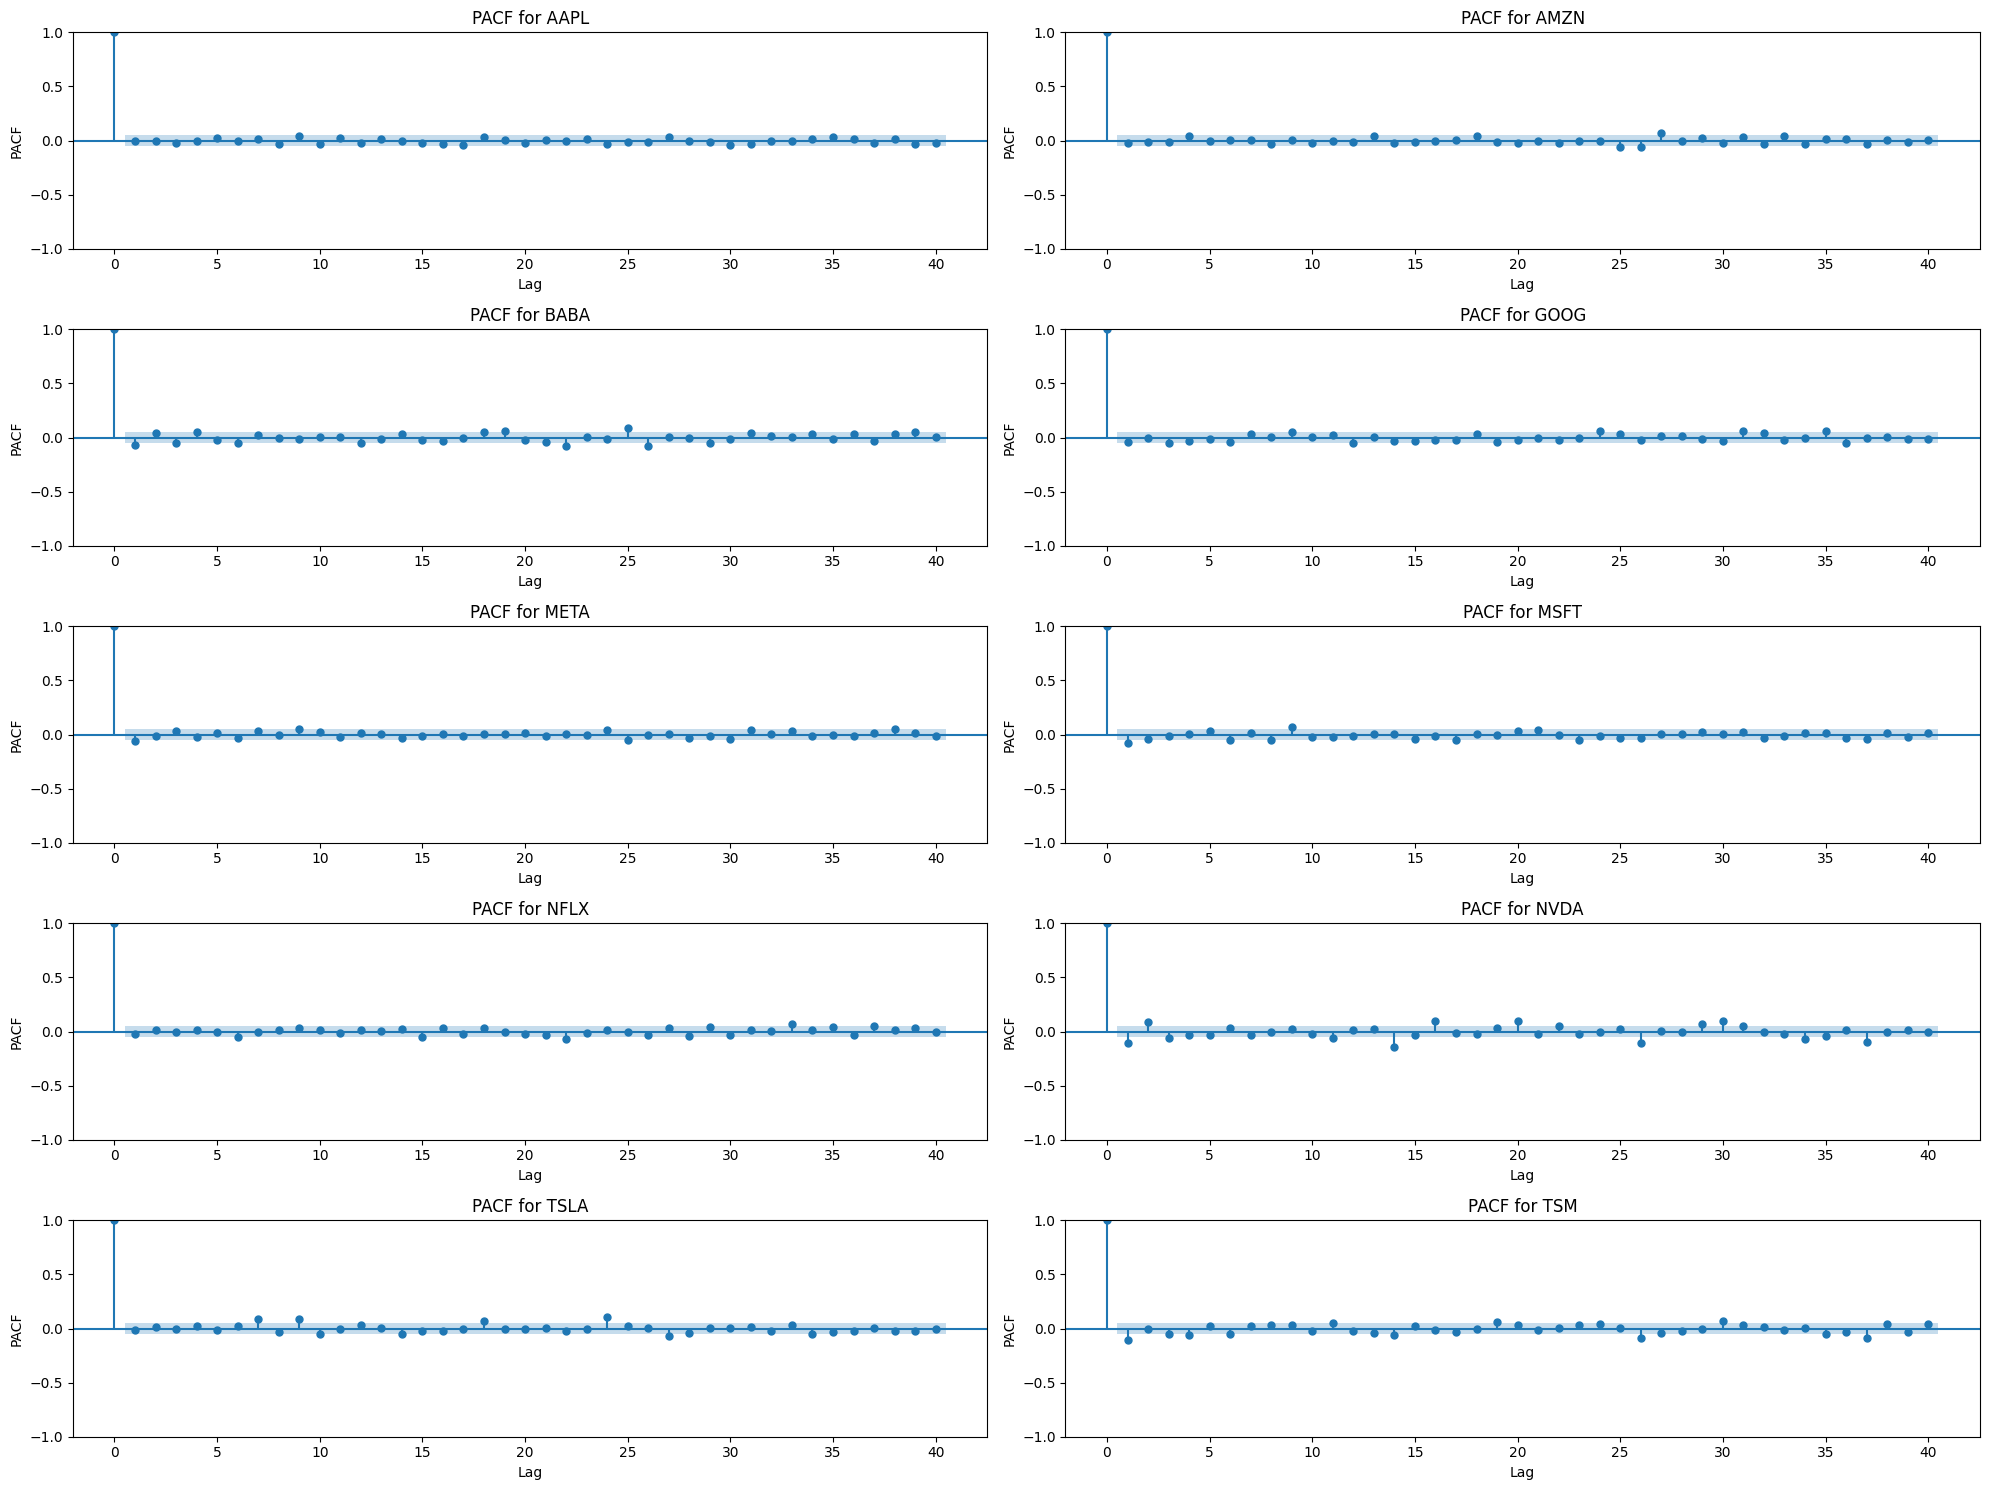

In [37]:
fig, axs = plt.subplots(5, 2, figsize=(20, 15))

tickers = sorted(df.Ticker.unique())

tick_count = 0

for i in range(0,5):
    for j in range(0,2):
        curr_ticker = tickers[tick_count]

        plot_pacf( x = df[df['Ticker'] == curr_ticker].copy().Close.diff().dropna() , ax=axs[i, j], lags=40)
        axs[i,j].set_title(f'PACF for {curr_ticker}')
        axs[i,j].set_xlabel('Lag')
        axs[i,j].set_ylabel('PACF')
        tick_count += 1



plt.tight_layout()
plt.show()

0            NaN
1      -0.706963
2       0.573799
3      -0.341347
4       1.162071
          ...   
1307    0.509995
1308   -1.309998
1309    2.550003
1310   -1.139999
1311    4.169998
Name: Close, Length: 1312, dtype: float64

In [40]:
x = [10, 14,5,8,12,16,40]


sum(x) / len(x)


15.0